In [5]:
library(Seurat)

In [6]:
data = read.csv("/home/ucsd-train13/scratch/projects/organoids/results/processed_files/counts_filt_800genes_5882cells.csv",
               row.names=1)
dim(data)
head(data)

[1] 12213  5882

,FBWT2_CAGGCATCTCCG,FBWT2_TCACCAGTCTCG,FBWT2_CCCGAGTCATAC,FBWT2_CGCTTACGTCTT,FBWT2_TTCCATATAGCT,FBWT2_TCCCGACCATAA,FBWT2_TAGTGATTATCA,FBWT2_GCCTCCATCGTT,FBWT2_GTACGATCAAGC,FBWT2_TAAACGTCACGG,...,FBIVS2_CGTTCGAGACCC,FBIVS2_ATACGCTCCCCA,FBIVS2_AGTGGTTTGTGG,FBIVS2_TTCGGACCGGTC,FBIVS2_AATGCGGCAGTA,FBIVS2_TATAGTATAAAG,FBIVS2_CAACAGGGTTCG,FBIVS2_ACGGGTAGTCTA,FBIVS2_GGGCGCGGTCTG,FBIVS2_AGGCATTATCCT
A1BG,0,0,0,0,1,2,1,1,0,1,...,0,0,0,0,0,1,0,0,0,1
A1BG-AS1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAAS,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
AACS,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
AADAT,1,0,1,3,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAED1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


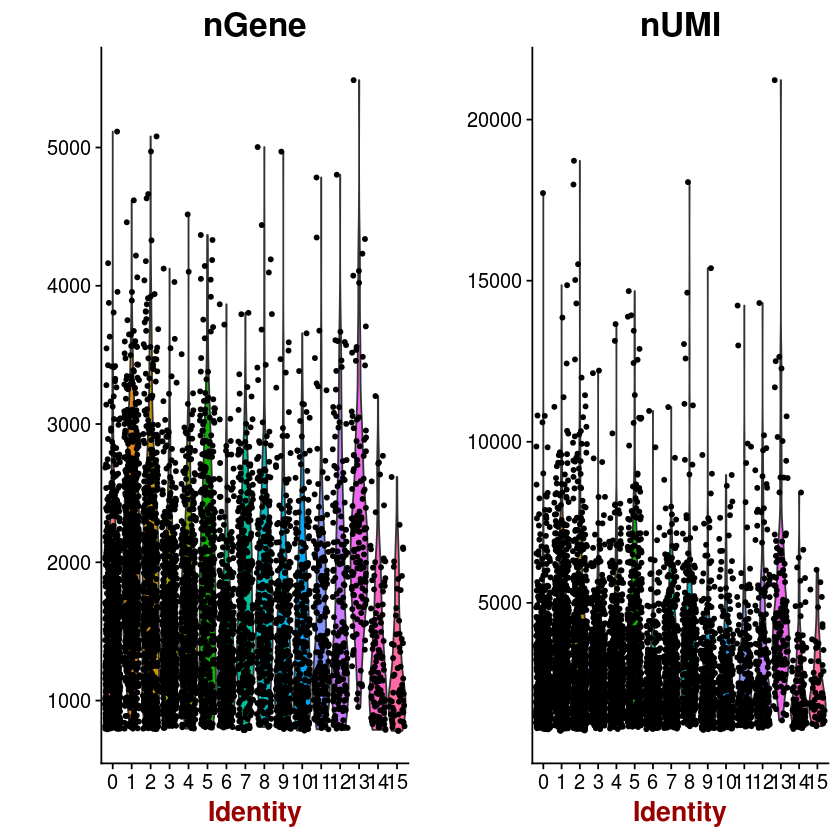

In [50]:
VlnPlot(object = fborganoids, features.plot = c("nGene", "nUMI"), nCol = 2)

In [7]:
fborganoids = CreateSeuratObject(raw.data=data)

In [8]:
fborganoids = NormalizeData(fborganoids)

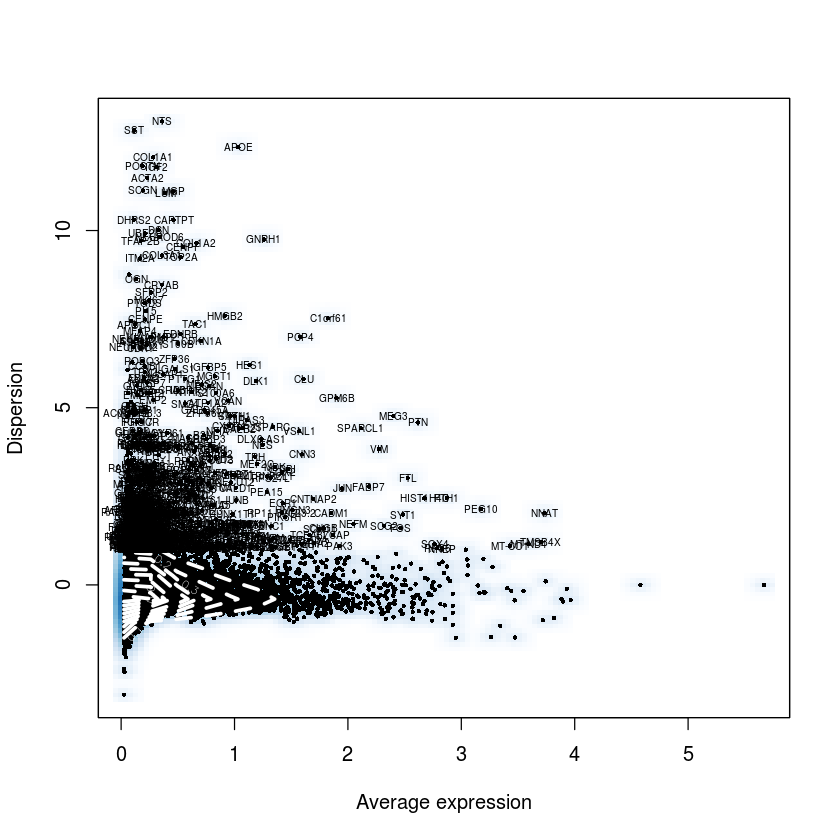

In [9]:
fborganoids = FindVariableGenes(fborganoids, x.low.cutoff = 0.1)

In [10]:
fborganoids <- ScaleData(fborganoids, genes.use = fborganoids@var.genes, model.use = "negbinom")

Scaling data matrix


In [11]:
fborganoids <- RunPCA(fborganoids, pcs.compute = 30, weight.by.var = FALSE)

[1] "PC1"
 [1] "PEG10"        "SYT1"         "NREP"         "CHGB"         "NEFM"        
 [6] "PAK3"         "GRIA2"        "SCG2"         "BLCAP"        "VSNL1"       
[11] "NTM"          "LRRN3"        "SYT4"         "RUNX1T1"      "SLC17A6"     
[16] "RP11-82C23.2" "AP1S2"        "TCEAL7"       "SOX4"         "MEF2C"       
[21] "POU2F2"       "CALB2"        "SLC8A1"       "PIK3R1"       "AKAP12"      
[26] "DIRAS3"       "DLX6-AS1"     "GABRB2"       "ONECUT2"      "RIMS2"       
[1] ""
 [1] "VIM"     "SPARC"   "SPARCL1" "HES1"    "CD99"    "CXCR4"   "ATP1A2" 
 [8] "NES"     "ZFP36L1" "PTPRZ1"  "MGST1"   "BCAN"    "GNG5"    "GPM6B"  
[15] "TTYH1"   "SOX2"    "FSTL1"   "PPAP2B"  "NFIA"    "ANXA2"   "MDK"    
[22] "PON2"    "PSAT1"   "B2M"     "TFPI"    "CNN3"    "NFIB"    "ANXA5"  
[29] "CLU"     "NPC2"   
[1] ""
[1] ""
[1] "PC2"
 [1] "ISLR"     "COL1A2"   "APOE"     "IGFBP7"   "LGALS3"   "ZFP36"   
 [7] "COL3A1"   "SPARCL1"  "ELN"      "COL1A1"   "IGFBP5"   "PRRX1"   
[13] "LAMA4"

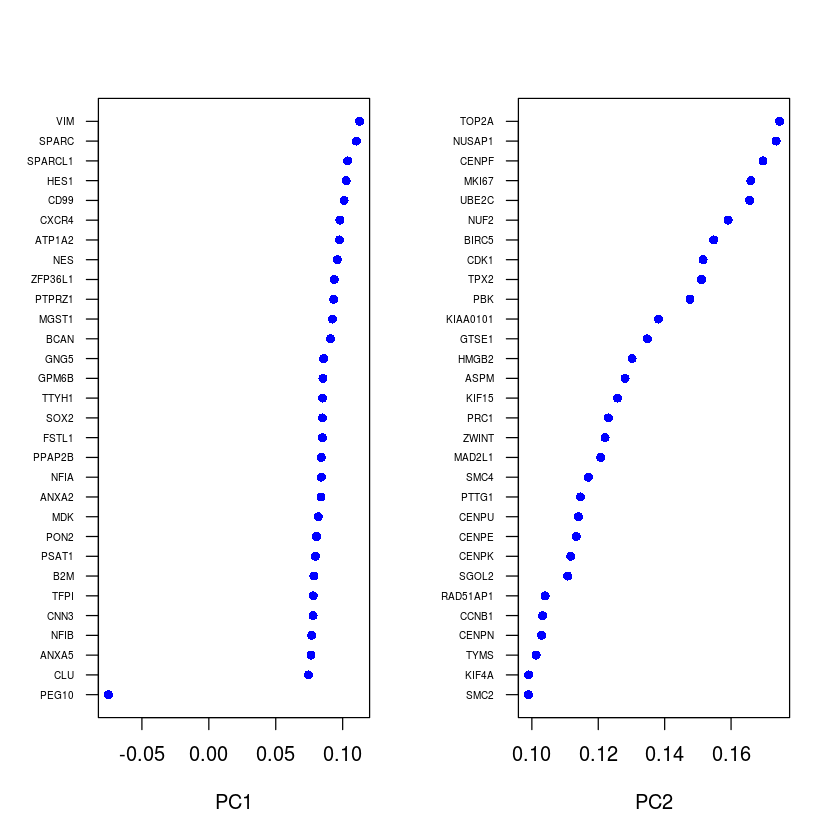

In [12]:
VizPCA(fborganoids, pcs.use = 1:2)

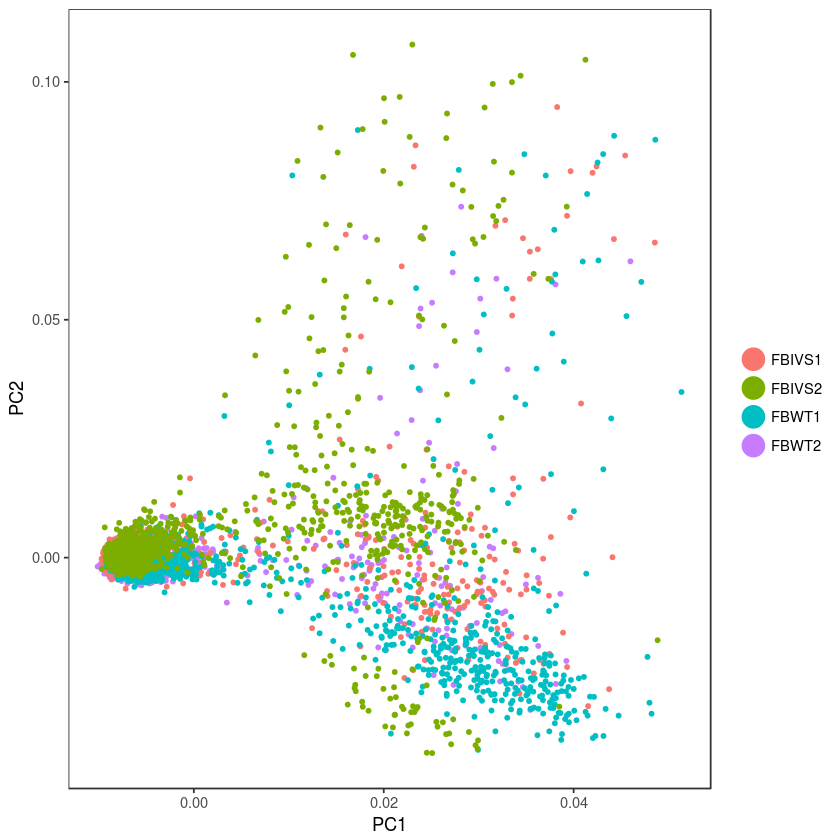

In [13]:
PCAPlot(fborganoids, dim.1 = 1, dim.2 = 2)

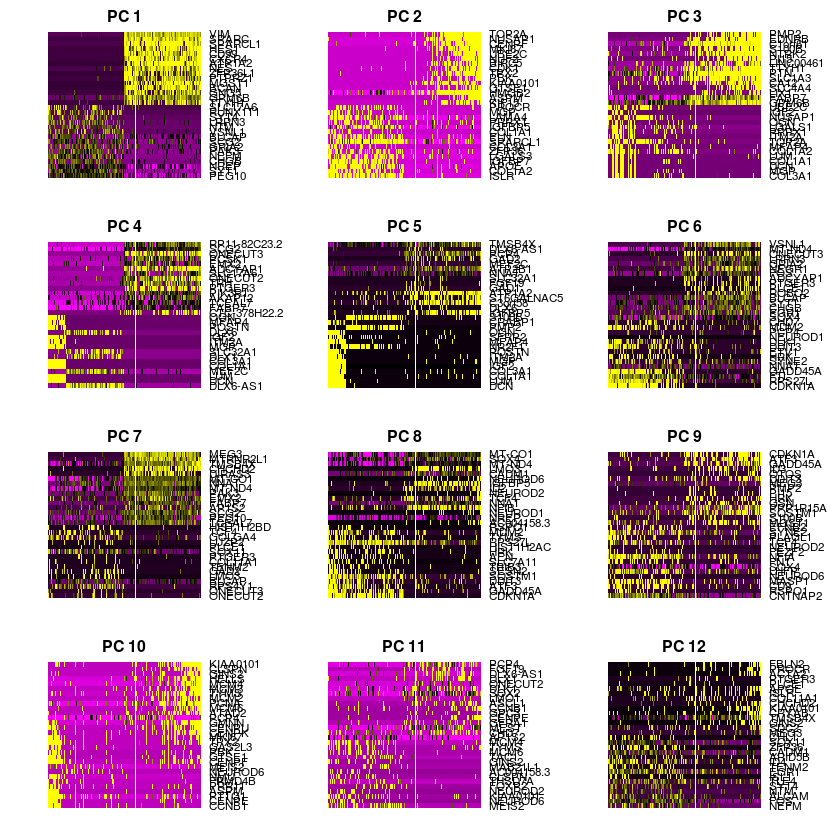

In [14]:
PCHeatmap(fborganoids, pc.use = 1:12, cells.use = 500, do.balanced = TRUE, 
    label.columns = FALSE, use.full = FALSE)

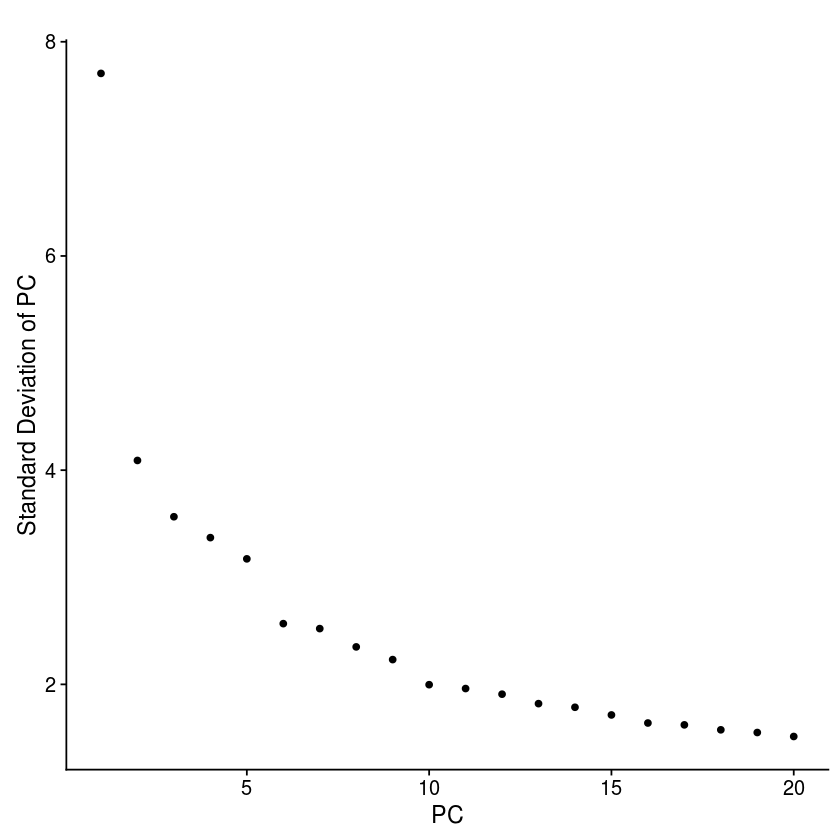

In [15]:
PCElbowPlot(fborganoids)

In [19]:
fborganoids <- RunTSNE(fborganoids, dims.use = 1:15, do.fast = T)

In [20]:
fborganoids <- FindClusters(fborganoids, reduction.type = "pca", dims.use = 1:15, save.SNN = T)

Warning message in BuildSNN(object = object, genes.use = genes.use, reduction.type = reduction.type, :
"Build parameters exactly match those of already computed and stored SNN. To force recalculation, set force.recalc to TRUE."Warning message in FindClusters(fborganoids, reduction.type = "pca", dims.use = 1:15, :
"Clustering parameters for resolution 0.8 exactly match those of already computed. 
  To force recalculation, set force.recalc to TRUE."

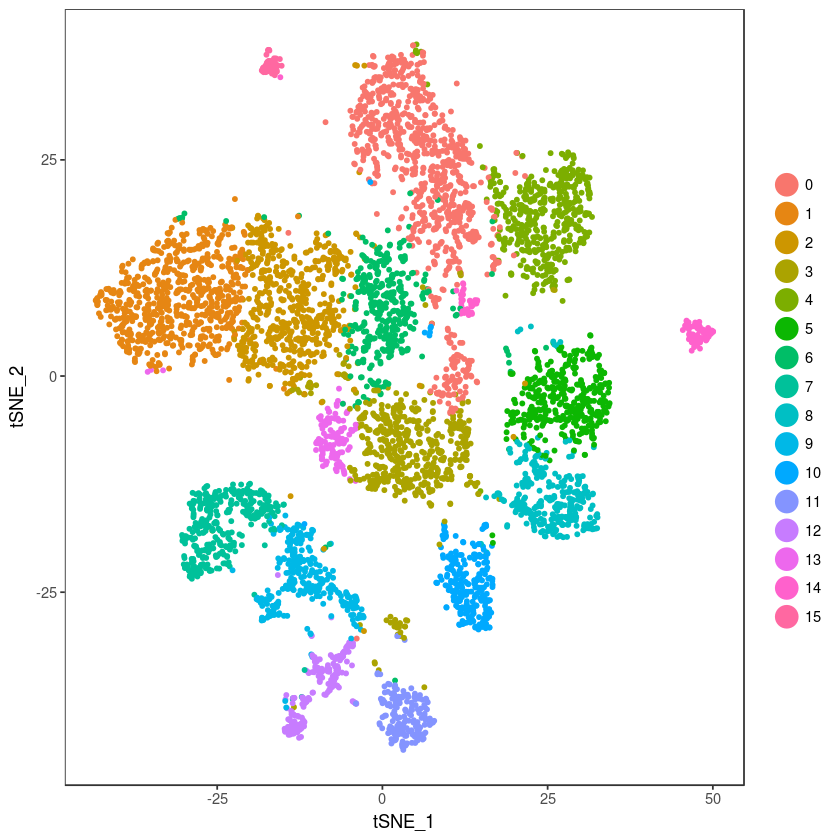

In [21]:
TSNEPlot(fborganoids)

In [52]:
write.csv(fborganoids@dr$tsne@cell.embeddings, file = "/home/ucsd-train13/scratch/projects/organoids/results/processed_files/tsne_from_Seurat.csv")

In [56]:
write.csv(fborganoids@meta.data$res.0.8, file="/home/ucsd-train13/scratch/projects/organoids/results/processed_files/clusterassignment.csv")

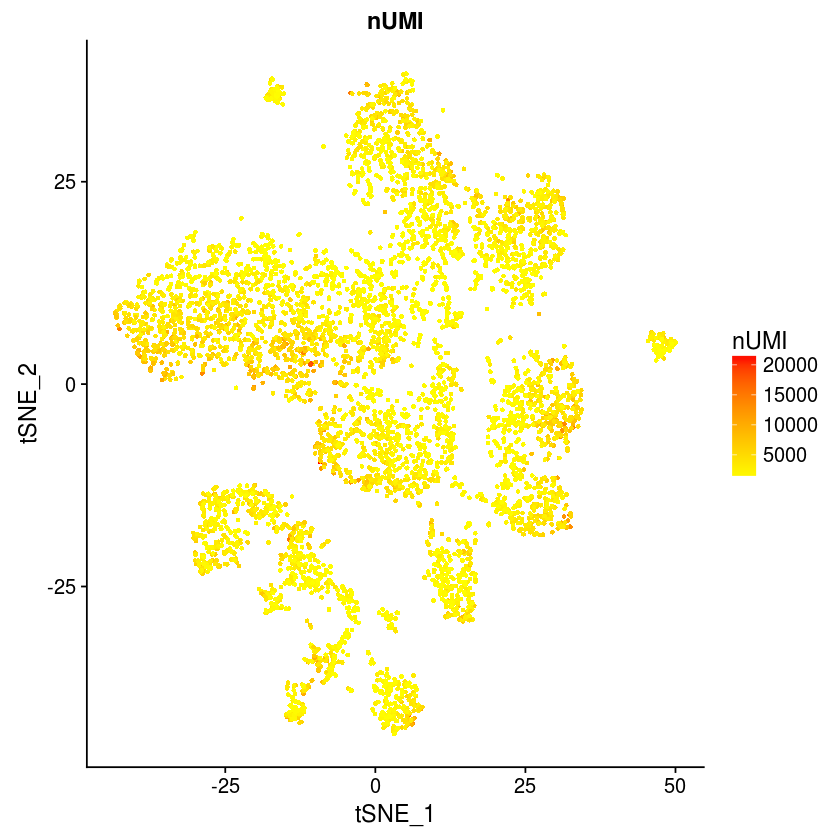

In [22]:
# Visualization by UMI counts
FeaturePlot(fborganoids, features.plot=c('nUMI'), pt.size=1, no.legend = FALSE)

In [23]:
# find markers for every cluster compared to all remaining cells, report
# only the positive ones
fborganoids.markers <- FindAllMarkers(fborganoids, only.pos = TRUE)

In [24]:
library(dplyr)
top5 <- fborganoids.markers %>% group_by(cluster) %>% top_n(5, avg_logFC)
top5


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0.000000e+00,1.5987214,0.725,0.108,0.000000e+00,0,DLX6-AS1
4.179295e-271,1.0328240,0.471,0.056,5.104172e-267,0,SLC32A1
2.131072e-261,1.5721110,0.682,0.191,2.602678e-257,0,MEF2C
5.216288e-99,2.1194814,0.262,0.054,6.370652e-95,0,GNRH1
6.814054e-82,1.0487823,0.284,0.074,8.322005e-78,0,MEIS2
0.000000e+00,1.8692019,0.852,0.058,0.000000e+00,1,ONECUT3
0.000000e+00,1.4829527,0.828,0.142,0.000000e+00,1,ONECUT2
0.000000e+00,1.3606293,0.588,0.045,0.000000e+00,1,PTGER3
0.000000e+00,1.1378452,0.607,0.080,0.000000e+00,1,ADCYAP1
6.021683e-186,1.1516530,0.402,0.060,7.354281e-182,1,COL11A1


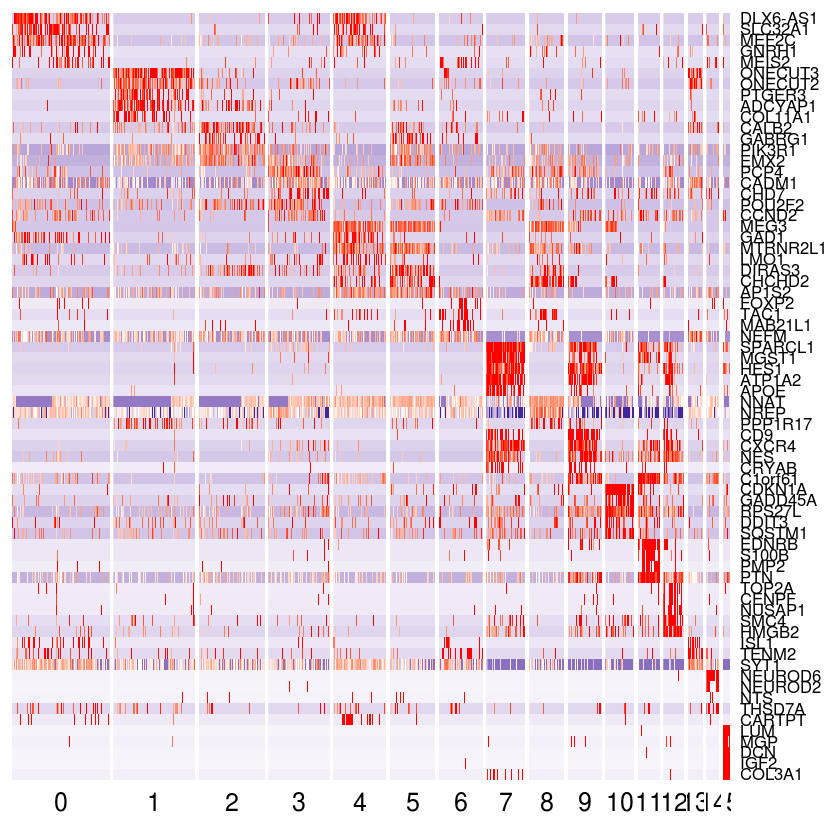

In [25]:
DoHeatmap(object = fborganoids, genes.use = top5$gene, slim.col.label = TRUE, remove.key = TRUE, col.low = "blue4",
  col.mid = "white", col.high = "red")

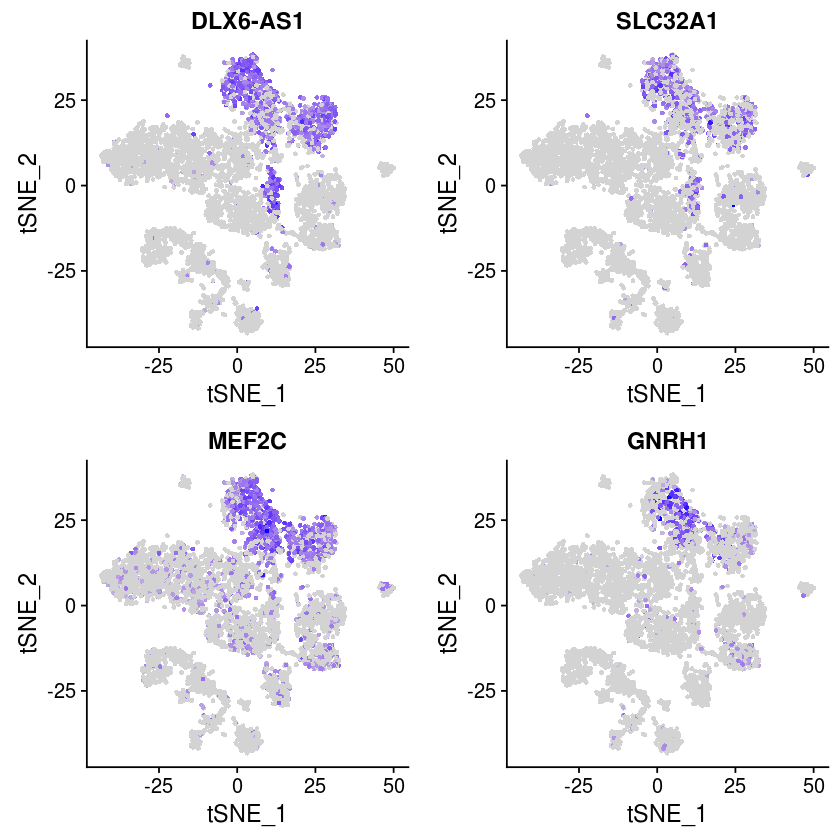

In [26]:
#feature plots for top 5 genes in cluster0
FeaturePlot(object = fborganoids, features.plot = c("DLX6-AS1","SLC32A1","MEF2C","GNRH1"),
            cols.use = c("lightgrey", "blue"))

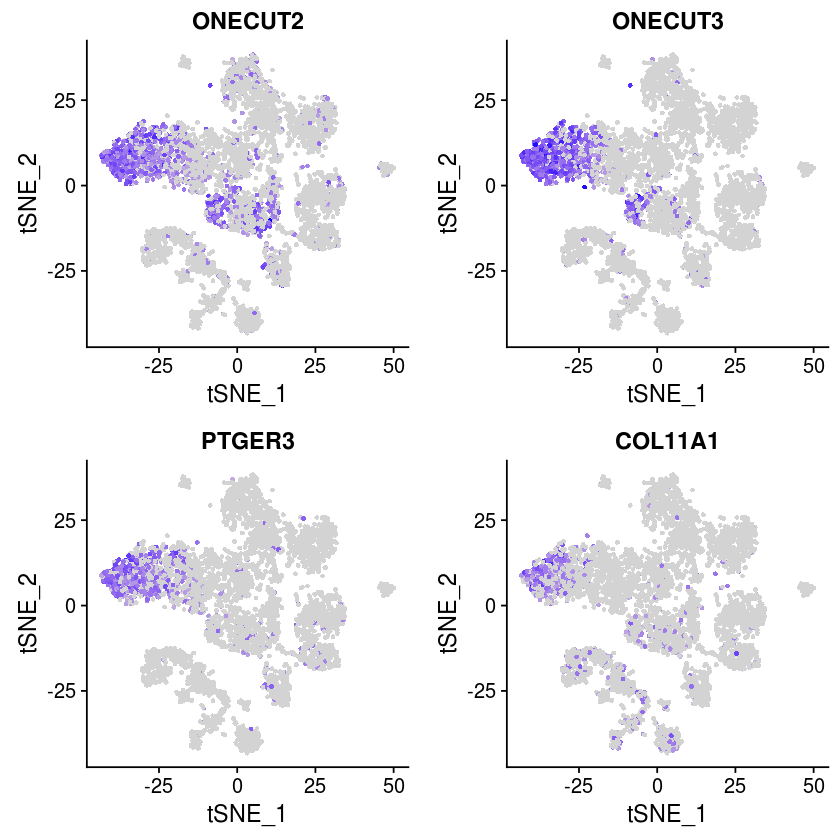

In [27]:
#feature plots for top 5 genes in cluster1
FeaturePlot(object = fborganoids, features.plot = c("ONECUT2","ONECUT3","PTGER3","COL11A1"),
            cols.use = c("lightgrey", "blue"))

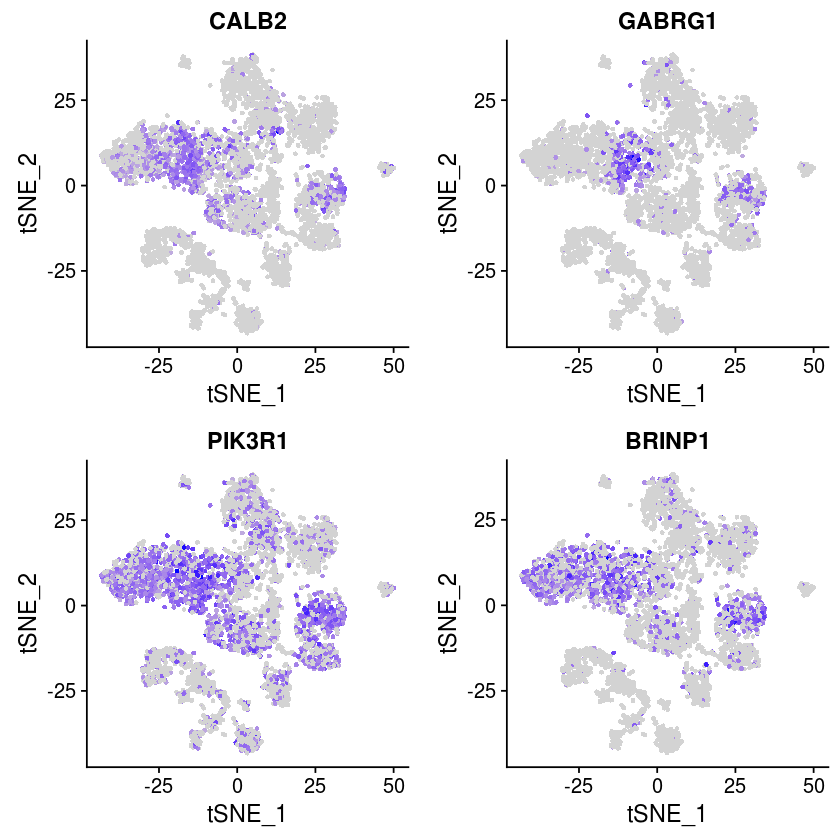

In [28]:
#feature plots for top 5 genes in cluster2
FeaturePlot(object = fborganoids, features.plot = c("CALB2","GABRG1","PIK3R1","BRINP1"),
            cols.use = c("lightgrey", "blue"))

In [29]:
#cluster 3 top 5 genes
top5_cluster3 <- top5[16:20,]
top5_cluster3

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
2.268968e-178,1.5836579,0.750,0.233,2.771090e-174,3,PCP4
7.151329e-79,0.7852714,0.857,0.586,8.733919e-75,3,CADM1
4.298541e-69,0.8369142,0.425,0.146,5.249808e-65,3,CHD7
7.120675e-59,0.8253882,0.535,0.247,8.696480e-55,3,POU2F2
1.079902e-50,0.8086397,0.467,0.204,1.318885e-46,3,CCND2


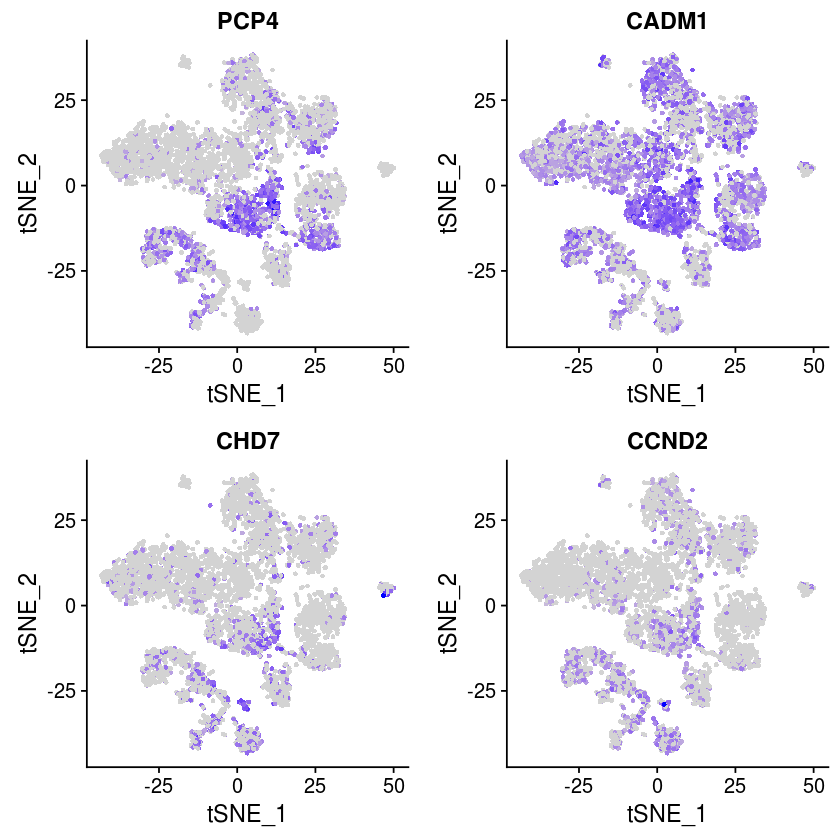

In [30]:
#feature plots for top 5 genes in cluste5 3
FeaturePlot(object = fborganoids, features.plot = c("PCP4","CADM1","CHD7","CCND2"),
            cols.use = c("lightgrey", "blue"))

In [31]:
#cluster 4 top 5 genes
top5_cluster4 <- top5[21:25,]
top5_cluster4

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
2.111912e-277,1.732922,0.864,0.169,2.579278e-273,4,MEG3
9.979611e-218,1.146697,0.769,0.149,1.218810e-213,4,DLX6-AS1
3.753410e-187,1.216524,0.607,0.116,4.584039e-183,4,GAD1
3.923881e-158,1.176828,0.813,0.281,4.792235e-154,4,MTRNR2L1
2.862818e-85,1.071833,0.401,0.105,3.496359e-81,4,LMO1


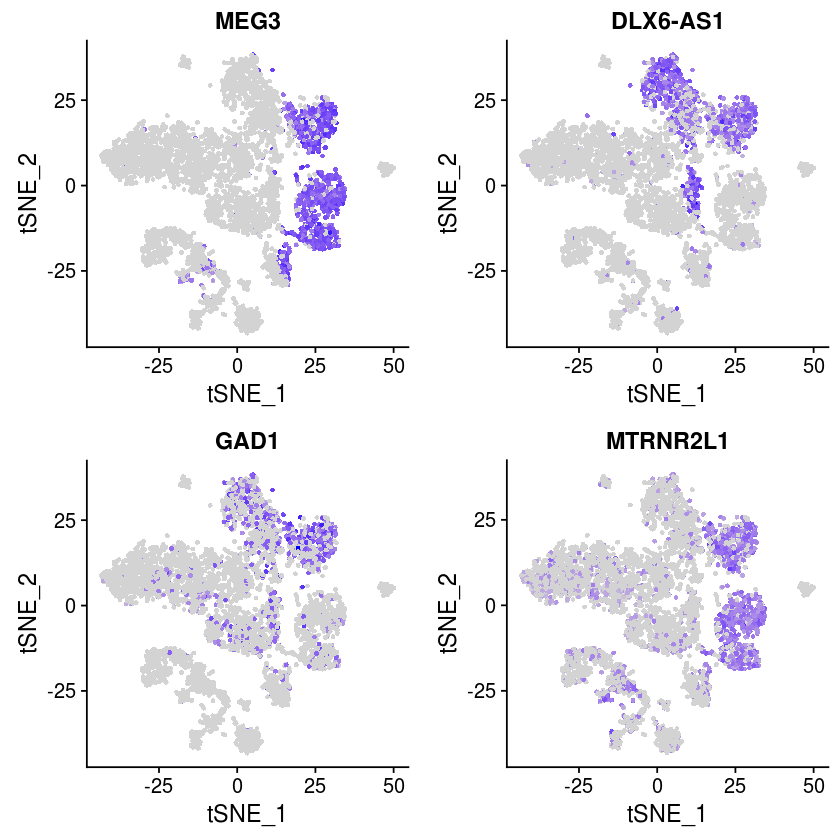

In [32]:
#feature plots for top 5 genes in cluster 4
FeaturePlot(object = fborganoids, features.plot = c("MEG3","DLX6-AS1","GAD1","MTRNR2L1"),
            cols.use = c("lightgrey", "blue"))

In [33]:
#cluster 5 top 5 genes
top5_cluster5 <- top5[26:30,]
top5_cluster5

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
1.685711e-254,1.511615,0.918,0.174,2.058759e-250,5,MEG3
6.043854e-176,1.180367,0.898,0.282,7.381359e-172,5,MTRNR2L1
1.209309e-161,1.376267,0.723,0.177,1.476929e-157,5,DIRAS3
9.462024e-149,0.986448,0.581,0.108,1.155597e-144,5,CHCHD2
7.862051e-96,1.017965,0.818,0.396,9.601923e-92,5,AP1S2


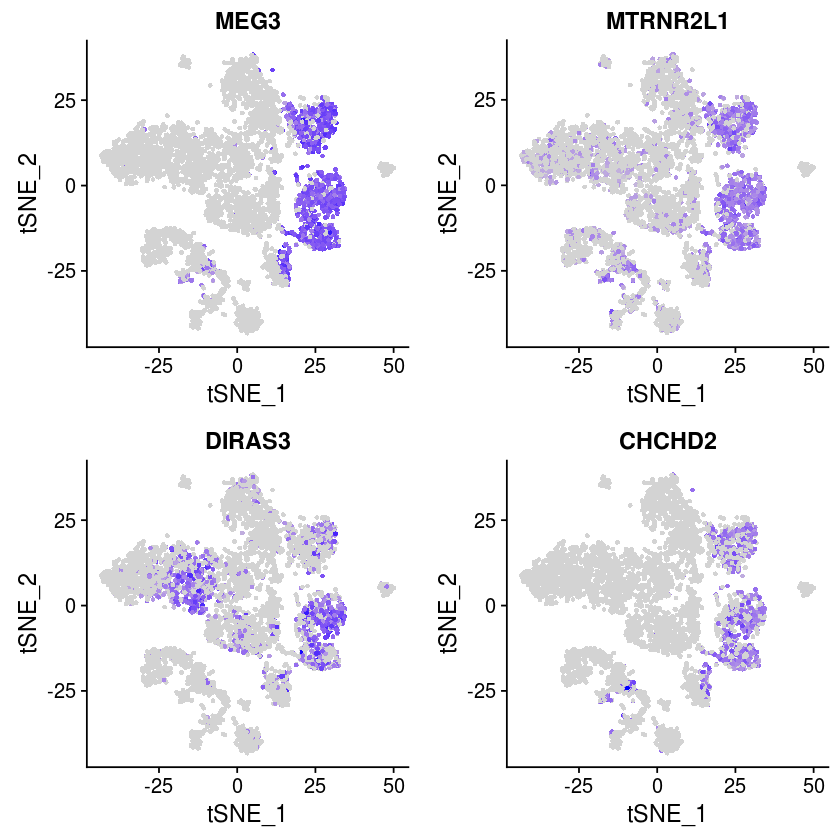

In [34]:
#feature plots for top 5 genes in cluste5 5
FeaturePlot(object = fborganoids, features.plot = c("MEG3","MTRNR2L1","DIRAS3","CHCHD2"),
            cols.use = c("lightgrey", "blue"))

In [35]:
#cluster 5 top 5 genes
top5_cluster8 <- top5[41:45,]
top5_cluster8

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
5.960892e-206,1.556145,0.923,0.186,7.280038e-202,8,MEG3
5.539403e-153,1.503957,1.000,0.646,6.765273e-149,8,NNAT
6.929255e-117,1.180534,0.994,0.873,8.462700e-113,8,NREP
4.704740e-113,1.144424,0.852,0.294,5.745899e-109,8,MTRNR2L1
4.426750e-70,1.102139,0.476,0.128,5.406389e-66,8,PPP1R17


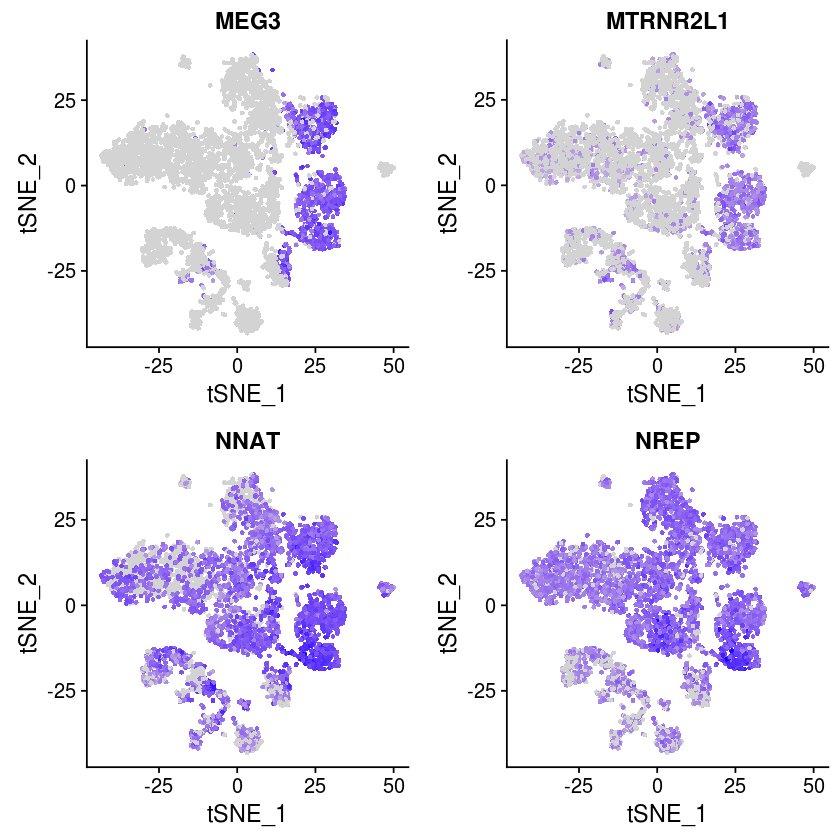

In [36]:
#feature plots for top 5 genes in cluster 8
FeaturePlot(object = fborganoids, features.plot = c("MEG3","MTRNR2L1","NNAT","NREP"),
            cols.use = c("lightgrey", "blue"))

In [37]:
#cluster 7 top 5 genes
top5_cluster6 <- top5[36:40,]
top5_cluster6

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0.000000e+00,2.679055,0.991,0.174,0.000000e+00,7,SPARCL1
0.000000e+00,2.307345,0.922,0.067,0.000000e+00,7,MGST1
0.000000e+00,2.211070,0.905,0.104,0.000000e+00,7,HES1
0.000000e+00,2.078911,0.862,0.071,0.000000e+00,7,ATP1A2
8.391821e-294,2.668156,0.560,0.043,1.024893e-289,7,APOE


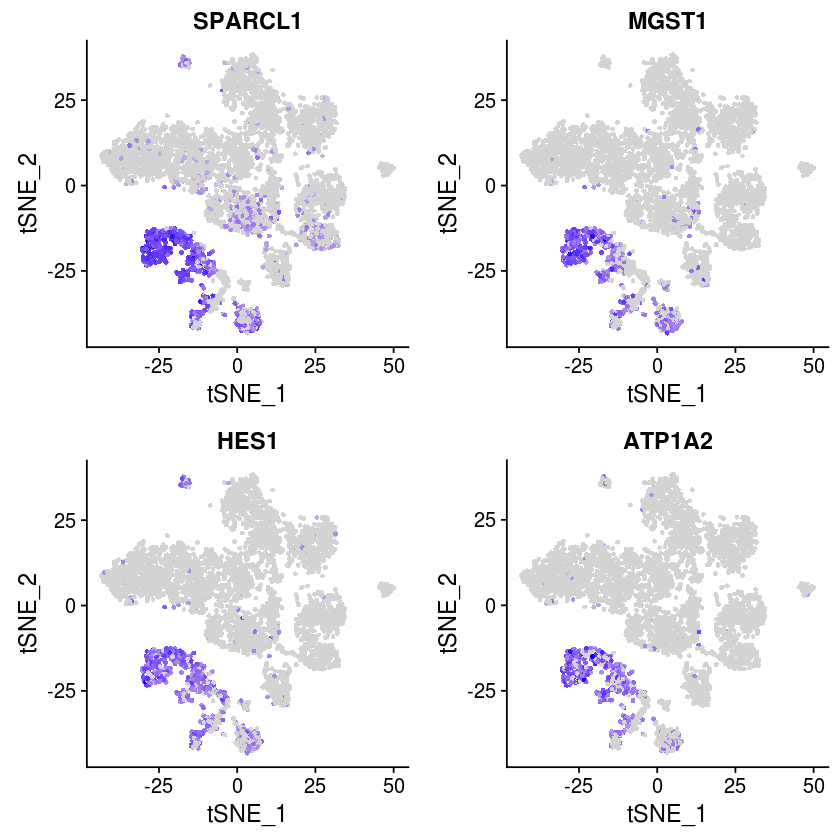

In [38]:
#feature plots for top 5 genes in cluster10
FeaturePlot(object = fborganoids, features.plot = c("SPARCL1","MGST1","HES1","ATP1A2"),
            cols.use = c("lightgrey", "blue"))

In [39]:
#cluster 10 top 5 genes
top5_cluster10 <- top5[51:55,]
top5_cluster10

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
0.000000e+00,2.517180,0.882,0.068,0.000000e+00,10,CDKN1A
8.728824e-139,1.879435,0.690,0.148,1.066051e-134,10,GADD45A
2.767784e-123,1.525854,0.882,0.319,3.380294e-119,10,RPS27L
1.344993e-89,1.296141,0.576,0.142,1.642640e-85,10,DDIT3
9.441749e-57,1.376311,0.592,0.239,1.153121e-52,10,SQSTM1


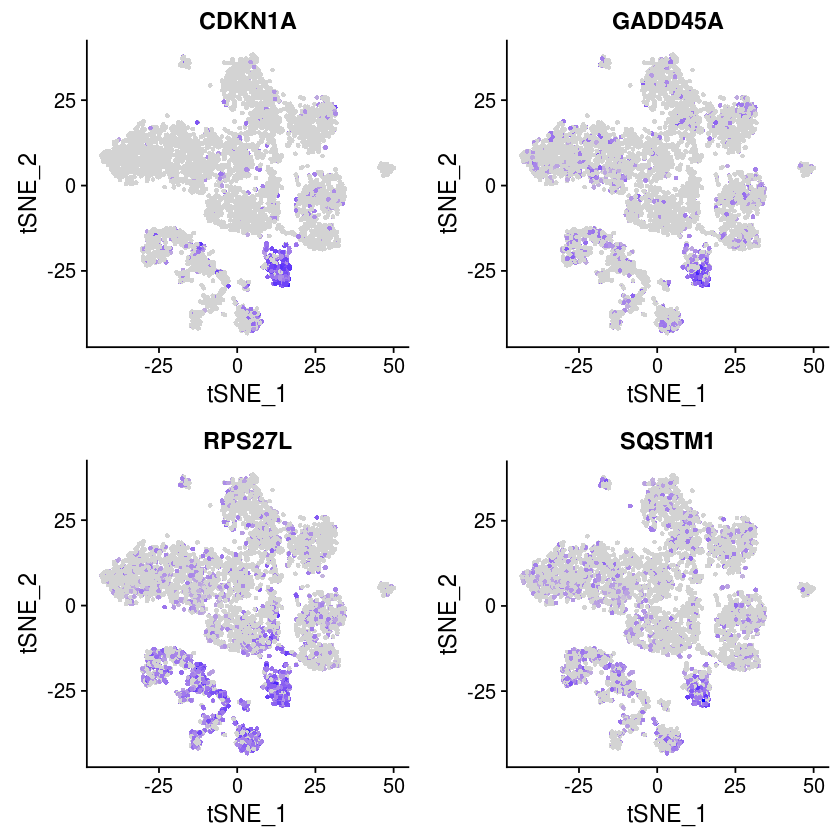

In [40]:
#feature plots for top 5 genes in cluster10
FeaturePlot(object = fborganoids, features.plot = c("CDKN1A","GADD45A","RPS27L","SQSTM1"),
            cols.use = c("lightgrey", "blue"))

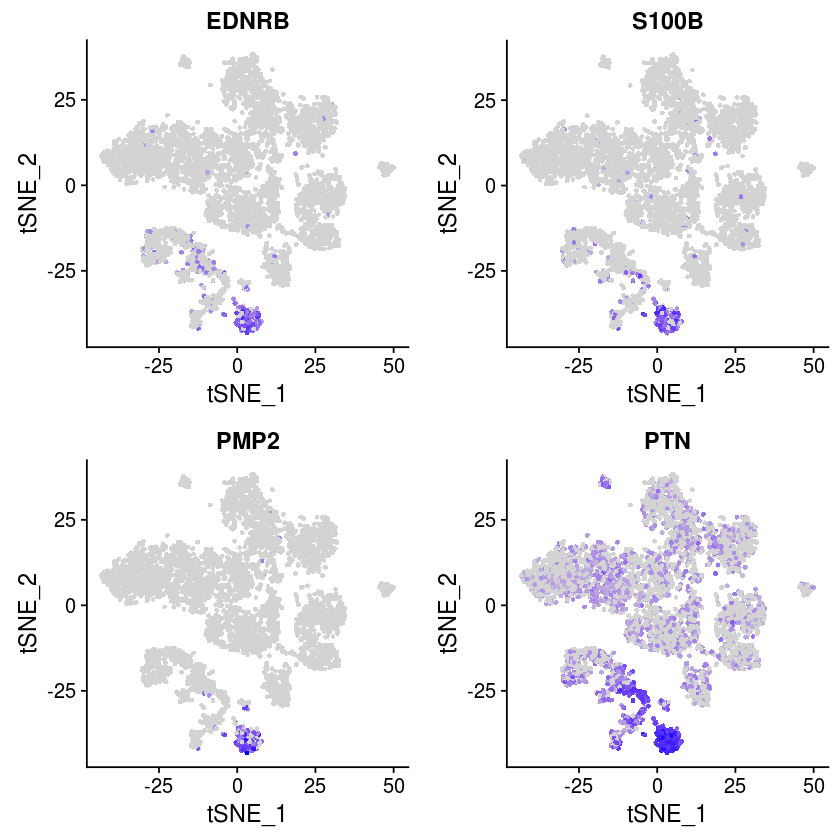

In [41]:
#feature plots for top 5 genes in cluster 11
FeaturePlot(object = fborganoids, features.plot = c("EDNRB","S100B","PMP2","PTN"),
            cols.use = c("lightgrey", "blue"))

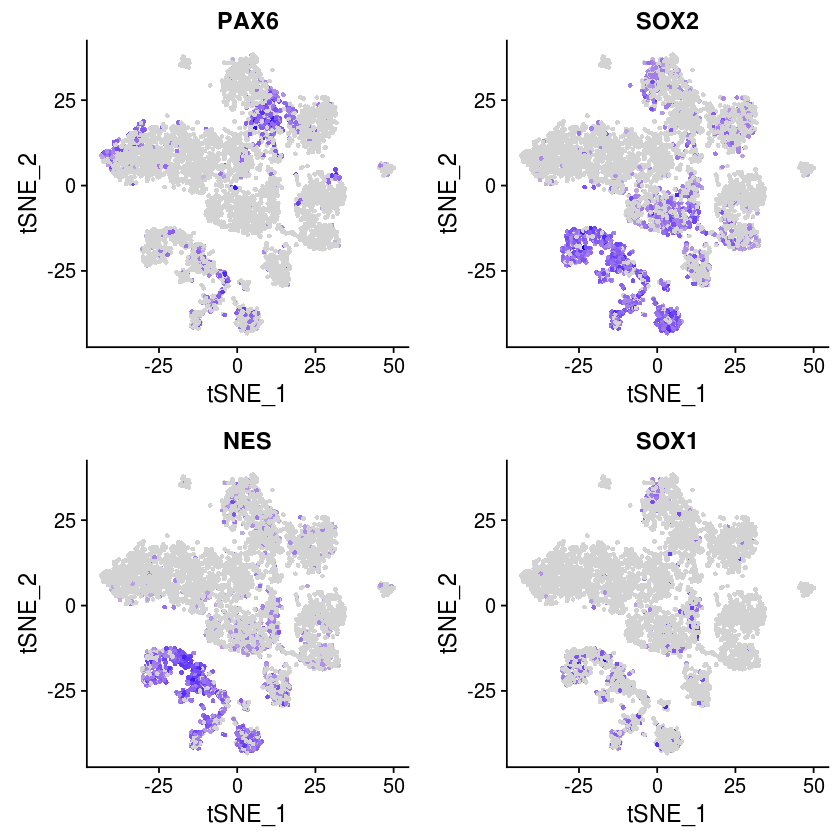

In [42]:
#feature plots for radial glia genes
FeaturePlot(object = fborganoids, features.plot = c("PAX6","SOX2","NES", "SOX1"),
            cols.use = c("lightgrey", "blue"))

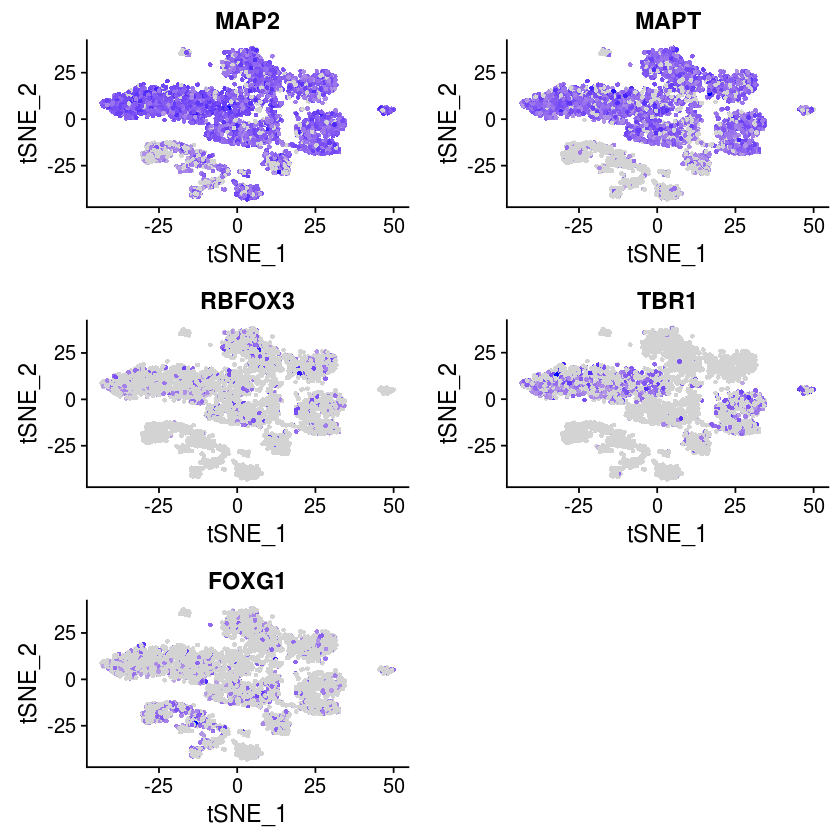

In [43]:
#feature plots for neuron markers
FeaturePlot(object = fborganoids, features.plot = c("MAP2","MAPT","RBFOX3","TBR1", "FOXG1"),
            cols.use = c("lightgrey", "blue"))

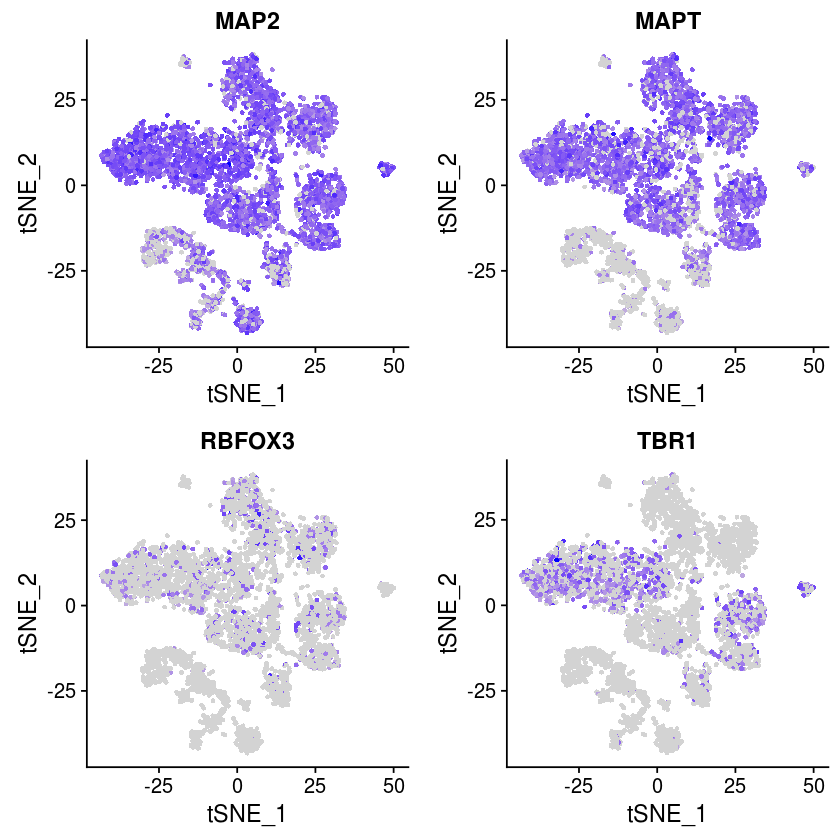

In [44]:
#feature plots for neuron markers
FeaturePlot(object = fborganoids, features.plot = c("MAP2","MAPT","RBFOX3","TBR1"),
            cols.use = c("lightgrey", "blue"))

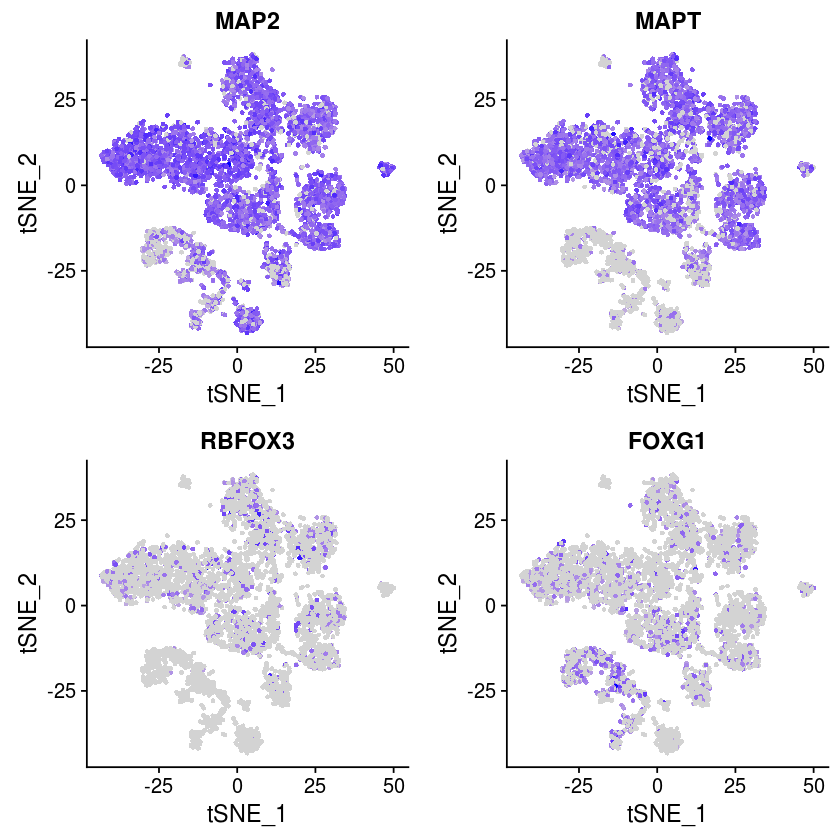

In [45]:
#feature plots for neuron markers
FeaturePlot(object = fborganoids, features.plot = c("MAP2","MAPT","RBFOX3", "FOXG1"),
            cols.use = c("lightgrey", "blue"))